In [ ]:
import numpy as np
import pandas as pd
from PIL import Image


In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import tensorflow as tf
import keras.backend as K

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/MyDrive/MLHW4/HW4_data.zip" # FILE PATH

In [ ]:
X_train = []
for i in range(10000):
    X_train.append(np.asarray(Image.open("HW4_data/public/train_{i}.jpg".format(i=i))))

df_train = pd.read_csv("HW4_data/public/train_label.csv", index_col=0)

In [ ]:
X_val = []
for i in range(1000):
    X_val.append(np.asarray(Image.open("HW4_data/public/val_{i}.jpg".format(i=i))))

df_val = pd.read_csv("HW4_data/public/val_label.csv", index_col=0)

In [ ]:
X_test = []
for i in range(1500):
    X_test.append(np.asarray(Image.open("HW4_data/private/test_{i}.jpg".format(i=i))))

df_test_demo = pd.read_csv("HW4_data/private/test_demo.csv", index_col=0)

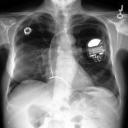

train_0.jpg


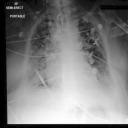

train_1.jpg


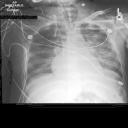

train_2.jpg


In [ ]:
import IPython.display as display
for i in range(3):
    image_path = "HW4_data/public/train_"+ str(i) +".jpg"
    display.display(display.Image(image_path, width=128, height=128))
    print(image_path.split('/')[-1])

In [ ]:
X_trainnormal = X_train
for i in range(10000):
  X_trainnormal[i] = X_train[i]/255.0

X_valnormal = X_val
for i in range(1000):
  X_valnormal[i] = X_val[i]/255.0

X_testnormal = X_test
for i in range(1500):
  X_testnormal[i] = X_test[i]/255.0

In [ ]:
xtrain = np.array(X_trainnormal)
xval = np.array(X_valnormal)
xtest = np.array(X_testnormal)

In [ ]:
xtrain.shape

(10000, 128, 128)

In [ ]:
xtrain[0]

array([[0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.01960784,
        0.02352941],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.        , 0.        ,
        0.        ],
       [0.00784314, 0.00784314, 0.00784314, ..., 0.02352941, 0.03137255,
        0.01568627],
       ...,
       [0.        , 0.        , 0.03529412, ..., 0.00392157, 0.00392157,
        0.01568627],
       [0.        , 0.        , 0.03137255, ..., 0.        , 0.00392157,
        0.01568627],
       [0.00392157, 0.        , 0.03137255, ..., 0.        , 0.00392157,
        0.01568627]])

In [ ]:
ytrain = df_train['Edema']
yval = df_val['Edema']
demogrphic = df_train[{'Age', 'Gender'}]

In [ ]:
valinput = df_val[{'Age', 'Gender'}].to_numpy()

In [ ]:
addinput = demogrphic.to_numpy()

In [ ]:
demogrphic

,Gender,Age
0,1,2
1,0,3
2,0,2
3,0,3
4,1,2
...,...,...
9995,0,2
9996,1,3
9997,1,3
9998,1,3


In [ ]:
addinput.shape[1]

2

In [ ]:
inp = tf.keras.Input(shape =(2,))

In [ ]:
x = layers.Dense(2, activation="relu")(inp)
x = layers.Dense(4, activation="relu")(x)
x = layers.Dense(2, activation="relu")(x)
x = tf.keras.Model(inputs=inp, outputs=x)

In [ ]:
train = tf.keras.Input(shape =(128,128,1))

In [ ]:

y = layers.Conv2D(32, (3, 3), activation='relu')(train)
y = layers.MaxPooling2D((2, 2))(y)
y = layers.Conv2D(64, (3, 3), activation='relu')(y)
y = layers.MaxPooling2D((2, 2))(y)
y = layers.Conv2D(64, (3, 3), activation='relu')(y)
y = layers.Flatten()(y)


In [ ]:
merge = layers.concatenate([x.output, y])

In [ ]:

merge = layers.Dense(64, activation='relu')(merge)
merge = layers.Dense(32, activation='relu')(merge)
merge = layers.Dense(2, activation='sigmoid')(merge)

In [ ]:
model = tf.keras.Model(inputs=[inp, train], outputs=merge)

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 126, 126, 32  320         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_3[0][0]']               
                                                                                            

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit([addinput, xtrain], ytrain, epochs=4,
                    validation_data=([valinput, xval], yval))

Epoch 1/4
313/313 [==============================] - 249s 793ms/step - loss: 0.4583 - accuracy: 0.7785 - val_loss: 0.4598 - val_accuracy: 0.7820
Epoch 2/4
313/313 [==============================] - 247s 788ms/step - loss: 0.4040 - accuracy: 0.8059 - val_loss: 0.3849 - val_accuracy: 0.8170
Epoch 3/4
313/313 [==============================] - 240s 765ms/step - loss: 0.3797 - accuracy: 0.8231 - val_loss: 0.3641 - val_accuracy: 0.8320
Epoch 4/4
313/313 [==============================] - 240s 767ms/step - loss: 0.3639 - accuracy: 0.8315 - val_loss: 0.3432 - val_accuracy: 0.8330


In [ ]:
results = model.evaluate([valinput, xval], yval, verbose=0)

In [ ]:
results


[0.34317395091056824, 0.8330000042915344]

In [ ]:
output = model.predict([valinput, xval])

In [ ]:
yvalpred = tf.argmax(output, axis=1)

In [ ]:
yvalpred

<tf.Tensor: shape=(1000,), dtype=int64, numpy=
array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
    

In [ ]:
dfyval = pd.DataFrame(yval)
dfyval

,Edema
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,0
997,1
998,0


In [ ]:
dfyvalpred = pd.DataFrame(yvalpred)

In [ ]:
dfyvalpred

,0
0,0
1,0
2,0
3,1
4,0
...,...
995,0
996,1
997,1
998,0


In [ ]:
import sklearn.metrics

In [ ]:
testinput = df_test_demo[{'Age', 'Gender'}].to_numpy()

In [ ]:
ypred = model.predict([testinput, xtest])
ypred = tf.argmax(ypred, axis=1)

In [ ]:
f1 = sklearn.metrics.classification_report(dfyval, dfyvalpred)

In [ ]:
f1

'              precision    recall  f1-score   support\n\n           0       0.90      0.87      0.88       718\n           1       0.69      0.74      0.72       282\n\n    accuracy                           0.83      1000\n   macro avg       0.79      0.81      0.80      1000\nweighted avg       0.84      0.83      0.83      1000\n'

In [ ]:
output_path = '108062172_bonus_prediction.csv'
test_pred = pd.DataFrame( {'Edema':ypred} )
test_pred.to_csv(output_path, index = True)

In [ ]:
model.save("HW4bonus.h5")

In [ ]:
  from sklearn.metrics import confusion_matrix
  confmat = confusion_matrix(y_true=dfyval, y_pred=dfyvalpred)
  TN, FN, FP, TP = confmat[0][0], confmat[0][1], confmat[1][0], confmat[1][1]
  pre, rec = (TP/(FP+TP)), (TP/(FN+TP))
  f1 = 2 * ((pre*rec)/(pre+rec))

In [ ]:
f1

0.7155025553662692